<a href="https://colab.research.google.com/github/Dengesizizm/ME462Project/blob/master/Week8/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

&nbsp;&nbsp;&nbsp;Welcome back to Control Systems Notebook! The topic of this week is the stability analysis of the control systems. We will learn what does stability means, why it is important for the control systems, and how we can obtain it.

# Stability Analysis

&nbsp;&nbsp;&nbsp; From the previous weeks, we know that the LTI system can be represented as $G(s)=\frac{Y(s)}{X(s)}$. The *stability analysis* will show us the response of the system to the input signals. We can then have an idea about what type of controller we need to satisfy the desired output conditions. To better understand the stability concept, let's look at the definitions of the different stability conditions and examples.

### Asymptotic Stability


&nbsp;&nbsp;&nbsp; The system $Y(s)=G(s)X(s)$ is called as asymptotically stable if its response to the impulse input is a finite value $y_f$ such that

$$\lim_{t\to \infty}y(t)=y_{f}.$$

&nbsp;&nbsp;&nbsp;Also, we can say that if the transfer function $G(s)$ has poles which have negative real parts, the system is asymptotically stable. From the Laplace transform we know that $\mathcal{L}^{-1}(\frac{1}{s+a})=e^{-at}$ and if the pole $s$ has negative real part, then $a>0$ and $\lim_{t\to \infty}e^{-at}=1.$ Therefore, the poles have negative real parts losing their effect as time passes and after some time system reaches the final value $y_f$.


### Marginal Stability


&nbsp;&nbsp;&nbsp; The system $Y(s)=G(s)X(s)$ named as marginally stable if its response to the impulse input remains bounded, i.e.,

$$|y(t)|\leq b < \infty.$$

&nbsp;&nbsp;&nbsp; If the transfer function $G(s)$ has *unrepeated* imaginary poles with zero real parts while others have negative real parts, the system is marginally stable. From the Laplace transform, the transfer function, which has only imaginary poles, can be shown as $\mathcal{L}^{-1}(\frac{w}{s^2+w^2})=sin(wt)$ which is a sinusoidal function. Therefore, if the transfer function has the poles with zero real parts while the rest of the poles have negative real parts, the system's output will be oscillatory and remain bounded.


### Instability


&nbsp;&nbsp;&nbsp; The system $Y(s)=G(s)X(s)$ is called instable if its response to the impulse input is infinite such that

$$\lim_{t\to \infty}y(t)\rightarrow \infty.$$

&nbsp;&nbsp;&nbsp;If the transfer function $G(s)$ has poles with positive real parts or repeated poles on the imaginary axis, the system is unstable. From the Laplace transform we know that $\mathcal{L}^{-1}(\frac{1}{s+a})=e^{-at}$ and if the pole $s$ has positive real part, then $a< 0$ and $\lim_{t\to \infty}e^{-at}=\infty.$ Moreover, if the system has repeated imaginary poles, $\mathcal{L}^{-1}(\frac{w}{(s^2+w^2)^2})=\frac{1}{2w^2}(sin(wt)-wtcos(wt))$ and $\lim_{t\to \infty}\frac{1}{2w^2}(sin(wt)-wtcos(wt))=\infty$. Therefore, the poles have positive real parts and repeated imaginary poles makes the system output infinity and system becomes unstable.


&nbsp;&nbsp;&nbsp;You can run the *code block* given below to see examples for each case including their response graphs.

<center><img src=https://raw.githubusercontent.com/Dengesizizm/ME462Project/master/Week8/Figures/Example.png height="200"></center>

&nbsp;&nbsp;&nbsp; The transfer functions of the systems are,

$$ G_{mass,\,spring,\,damper}(s)=\frac{X(s)}{F(s)}=\frac{1}{ms^2+bs+k}$$

$$ G_{mass,\,spring}(s)=\frac{X(s)}{F(s)}=\frac{1}{ms^2+k}$$

$$ G_{inverted\, pendulum}(s)=\frac{\Theta(s)}{X(s)}=\frac{-s^2}{ls^2-g}$$




$$    G_{mass,\,spring, \, damper}(s) =\frac{20}{s^2 + 10 s + 20}                                G_{mass,\,spring}(s) =\frac{20}{s^2 + 20}                                 G_{inverted\,pendulum}(s) =\frac{-s^2}{s^2 - 9.81}$$

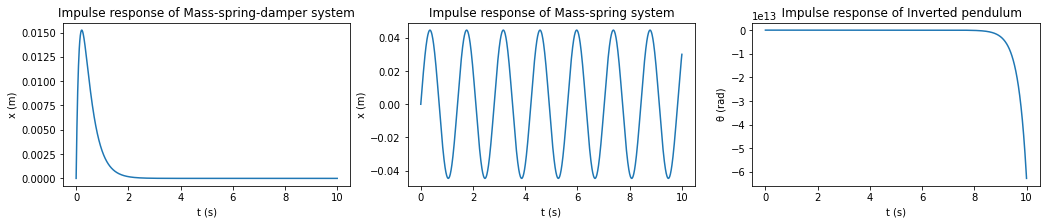

Output()

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install nodejs
!pip install control
from IPython.display import clear_output
clear_output()
import ipywidgets as widgets
import control
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from IPython.display import Markdown as md
from control import TransferFunction as tf
from control import minreal
from control import impulse_response, step_response
from IPython.display import clear_output
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, HBox, Label, VBox, interactive_output
import warnings

warnings.filterwarnings("ignore")

def d_e(a):
  a_latex = a._repr_latex_()
  a_latex = a_latex[2:-2]
  return a_latex

def open_loop(m,k,b,l):
  
  T = np.linspace(0, 10,1000)
  t,y1=impulse_response(tf([1], [m, b, k]),T) 
  t,y2=impulse_response(tf([1], [m, 0, k]),T)
  t,y3=impulse_response(tf([-1,0,0], [l, 0, -9.81]),T)
 
  f = plt.figure(figsize=(17.5,3))
  ax = f.add_subplot(131)
  ax1 = f.add_subplot(132)
  ax2 = f.add_subplot(133)
  ax.plot(t, y1)
  ax1.plot(t, y2)
  ax2.plot(t, y3)
  ax.set_title('Impulse response of Mass-spring-damper system')
  ax1.set_title('Impulse response of Mass-spring system')
  ax2.set_title('\xa0\xa0\xa0Impulse response of Inverted pendulum')
  ax.set_xlabel('t (s)')
  ax1.set_xlabel('t (s)')
  ax2.set_xlabel('t (s)')
  ax.set_ylabel('x (m)')
  ax1.set_ylabel('x (m)')
  ax2.set_ylabel('θ (rad)')
  
  print("\n")
  display(md("$$ \xa0\xa0 G_{mass,\,spring, \, damper}(s) =" + d_e(minreal(tf([k], [m, b, k]),verbose=False)) + "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 G_{mass,\,spring}(s) =" + d_e(minreal(tf([k], [m, 0, k]),verbose=False)) + "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 G_{inverted\,pendulum}(s) =" + d_e(minreal(tf([-1,0,0], [l, 0, -9.81]),verbose=False)) + "$$"))
  print("\n")
display(md("$ $"))
m = widgets.FloatSlider(value=5, min=0.1,max=50.0, step=0.1,description='m =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',)
k = widgets.FloatSlider(value=100, min=0,max=500.0, step=0.1,description='k =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',)
b = widgets.FloatSlider(value=50, min=0,max=500.0, step=0.1,description='b =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',)
l = widgets.FloatSlider(value=1, min=0.1,max=5.0, step=0.1,description='l =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',)

out1 = interactive_output(open_loop,{"m":m, "k":k, "b":b, "l":l})
hbox1 = HBox((m,Label('kg'), k,Label('N/m'),b,Label('N.s/m')))
hbox2 = HBox((l,Label('m')))


display(hbox1,hbox2,out1)

&nbsp;&nbsp;&nbsp; You can observe that from the impulse response plots, the mass-spring-damper system is asymptotically stable, the mass-spring system is marginally stable and inverted pendulum is an unstable system.

&nbsp;&nbsp;&nbsp; We have learned how the pole places affect the system's stability. However, finding pole locations of the higher-order systems isn't an easy process. Therefore, for a faster stability analysis process, the *Routh-Hurtwiz criterion* is used. 


## Stability Analysis by Routh-Hurwitz Criterion


&nbsp;&nbsp;&nbsp; Let's write the transfer function of an LTI system $G(s)$ as a fraction, i.e.,

$$G(s)=\frac{N(s)}{D(s)}$$

&nbsp;&nbsp;&nbsp; where the numerator $N(s)$ and denominator $D(s)$ can be written in the form including zeros and poles of the system as

$$N(s) = b(s-z_1)(s-z_2)...(s-z_m)$$
$$D(s) = a(s-p_1)(s-p_2)...(s-p_n).$$

&nbsp;&nbsp;&nbsp;In the Routh-Hurtwiz analysis, we will focus on the $D(s)$ which is called as characteristic polynomial and $D(s)=0$ is the characteristic equation of the $G(s)$.


### Hurwitz Criterion

&nbsp;&nbsp;&nbsp; If the polynomial $D(s)=a_ns^n+a_{n-1}s^{n-1}+...+a_2s^2+a_1s+a_0$ have coefficients such as $a_k> 0$ for all the $s$ terms, then we can say that system $G(s)$ is not stable, it is marginally stable or unstable. This criterion gives us a chance to understand whether the given system can be stable or not at first glance. However, satisfying the Hurwitz criteria does not mean that the system is stable; it only says that a system *can be* a stable system. To understand that the system is stable or not, we should check the *Routh criterion*.

### Routh Criterion

&nbsp;&nbsp;&nbsp; To be able to apply the Routh criterion, first we should construct the Routh array which is composed of coefficients of the characteristic polynomial, i.e.,
$$D(s)=a_ns^n+a_{n-1}s^{n-1}+...+a_2s^2+a_1s+a_0.$$

&nbsp;&nbsp;&nbsp; The Routh array can be constructed as following;
* First, check the number of coefficients which is equal to $n$

* Then, calculate the number of rows and columns of the Routh array as,
  * $\#\space of\space rows = n+1$

  * $
  \begin{align*}
 \#\space of\space columns &=
  \begin{cases}
   n/2        & \text{if } n\space is\space even. \\
   (n+1)/2        & \text{if } n\space is\space odd.
  \end{cases}
  \
\end{align*}
  $
  * Place the coefficients into the first two rows as following,

    $n.\space\space\space\space\space a_{n\space \space \space \space }\space a_{n-2}\space a_{n-4}\space ...\space a_1$

    $n\text{-}1.\space\space a_{n-1}\space a_{n-2}\space a_{n-4}\space ...\space a_1$

  * Then, fill the other rows as
  $n\text{-}2.\space\space c_{n-2}\space d_{n-2}\space e_{n-2}\space ...$

   $\space\space\space\vdots\space\space\space\space\space\space\space\space\vdots\space\space\space\space\space\space\space\space\vdots\space\space\space\space\space\space\space\space\vdots$

     $\space\space2.\space\space\space\space\space\space c_{2}\space\space\space\space\space d_{2}$
     
     $\space\space1.\space\space\space\space\space\space c_{1}$
      
      $\space\space0.\space\space\space\space\space\space c_{0}$

      where the formulas are given as

      $c_{n-2}=\frac{a_{n-1}a_{n-2}-a_{n}a_{n-3}}{a_{n-1}}$

      $d_{n-2}=\frac{a_{n-1}a_{n-4}-a_{n}a_{n-5}}{a_{n-1}}$

      $c_{k-1}=\frac{c_{k}d_{k+1}-c_{k+1}d_{k}}{c_{k}}$

      $d_{k-1}=\frac{c_{k}e_{k+1}-c_{k+1}e_{k}}{c_{k}}$

      $\space\space\space\space\vdots$

* If the first column of the Routh array has only positive coefficients, then it is stable.

* If there is a sign change in the first column of the array, then the system is unstable. If there is a zero in the first column while the other row element is non-zero, the system is unstable again.

* If there is a row of zeros (where all of the row elements are zero) in the Routh array while the poles of the polynomial of the previous row are imaginary and distinct and the coefficients of the first column are positive, the system is marginally stable. If the coefficients of the first column has sign change, then the system is unstable.

&nbsp;&nbsp;&nbsp; You can find examples of these cases in your textbook and class notes, including more detailed explanations. Be sure to understand them and do enough practice by solving these examples yourself.

&nbsp;&nbsp;&nbsp; We will continue with a study case, which will show us how the Routh criterion can be used while designing a closed-loop controller.

&nbsp;&nbsp;&nbsp; <ins>***Case Study: Designing a Closed Loop Controller by using Routh-Hurwitz Stability Criterion***</ins>

&nbsp;&nbsp;&nbsp; In this example, we will use the DC servomotor transfer function provided in the 6th weeks Colab and we will try to determine controller gain $K$ by using Routh-Hurwitz criterion to make the DC servomotor response stable. The block diagram of the closed-loop system is given below.

<center><img src=https://raw.githubusercontent.com/Dengesizizm/ME462Project/master/Week8/Figures/Case%20study.png height="200"></center>

&nbsp;&nbsp;&nbsp; We can find the closed-loop transfer function of the system as

$$G(s)=\frac{C(s)}{R(s)}=\frac{K(1+\frac{1}{Ts})\frac{100}{0.02s+1}}{1+K(1+\frac{1}{Ts})\frac{100}{0.02s+1}\frac{2}{s+0.002}} $$

&nbsp;&nbsp;&nbsp; where the characteristic polynomial of the $G(s)$ is

$$ D(s) = Den \left(\frac{K(1+\frac{1}{Ts})\frac{100}{0.02s+1}}{1+K(1+\frac{1}{Ts})\frac{100}{0.02s+1}\frac{2}{s+0.002}} \right) = Ts^3+50.002Ts^2+(10000KT+0.1T)s+10000K.$$

&nbsp;&nbsp;&nbsp; After obtaining the characteristic polynomial, we can construct the Routh array as

$$a_3=T,\space a_2=50.002T, \space a_1=(10000KT + 0.1T), \space a_0=10000K$$

$$c_1 = \frac{a_2a_1-a_3a_0}{a_2}= \frac{(500020K+5.0002)T^2-10000KT}{50.002T} $$
$$c_0= \frac{c_1a_0-a_20}{c_1}=a_0=10000K$$

&nbsp;&nbsp;&nbsp; where the Routh array is 

  $\space\space\space\space\space\space3.\space\space\space\space\space\space a_{3}\space\space\space\space\space a_{1}$

  
  $\space\space\space\space\space\space2.\space\space\space\space\space\space a_{2}\space\space\space\space\space a_{0}$
     
  $\space\space\space\space\space\space1.\space\space\space\space\space\space c_{1}$
      
  $\space\space\space\space\space\space0.\space\space\space\space\space\space c_{0}$


&nbsp;&nbsp;&nbsp; Since for a stable system  the coefficients of the first column should be positive numbers, we can find the controller parameter conditions require for the stability of the system as

$$a_3>0\rightarrow T>0$$

$$ a_2>0\rightarrow 50.002T>0$$

$$ c_0>0 \rightarrow K>0$$

$$c_1>0\rightarrow (500020K+5.0002)T^2>10000KT\rightarrow T>\frac{10000K}{500020K+5.0002}$$

&nbsp;&nbsp;&nbsp; By using the Routh-Hurwitz criterion, we found the controller parameter limitations for the stable system. Now let's check this result by running the code block given below. You can set the $K$ and $T$ values and observe the system response.

&nbsp;&nbsp;&nbsp; *(For example, if we choose the controller gain as $K=20$, integral time should satisfy the condition $T>0.02$ for the stability. If we choose the integral time as $T<0.02$ the system becomes unstable since it will cause the sign change in the first column and if choose the $ T \approx 0.02$ the system becomes marginally stable since there will be a row of zeros in the 1st row of the Routh array. You can check these conditions in the code below!)*







In [ ]:
import ipywidgets as widgets
import control
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from IPython.display import Markdown as md
from control import TransferFunction as tf
from control import minreal
from control import impulse_response, step_response
from IPython.display import clear_output
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, HBox, Label, VBox, interactive_output
import warnings

warnings.filterwarnings("ignore")

def d_e(a):
  a_latex = a._repr_latex_()
  a_latex = a_latex[2:-2]
  return a_latex

def closed_loop(K,Ti):
  C = tf([Ti,1], [Ti,0])
  Gp = tf([100], [0.02, 1])
  H = tf([2], [1,0.002])
  Gs = K*C*Gp
  G = Gs/(1+Gs*H)
  T1 = np.linspace(0, 5,1000)
  t,y4=impulse_response(G,T1) 

  plt.plot(t,y4, "-r")
  plt.grid()
  plt.xlabel('t (s)')
  plt.ylabel('w (rad/s)')
  plt.title("Impulse response of the Closed-loop system")
  print("\n")
  display(md("$ \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 G(s) =" + d_e(minreal(G,verbose=False)) + "$"))
  print("\n")
display(md("$ $"))
K = widgets.FloatSlider(value=20, min=0.0,max=50.0, step=0.1,description='K =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',)
Ti = widgets.FloatSlider(value=0.02, min=0.001,max=0.05, step=0.001,description='T =',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.3f',)


out1 = interactive_output(closed_loop,{"K":K, "Ti":Ti})

display(K,Ti,out1)

&nbsp;&nbsp;&nbsp; We came to the end of this Week's Colab! Next week, we will learn how to handle steady-state error analysis for the closed-loop (feedback) systems.